Types of recommendations

1.Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.

2.Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
    
3.Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item


Attribute Information:¶
    
● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( ignore this column for this exercise)

In [1]:
#IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#LOAD THE DATASET AND ADD HEADERS (SHOES AND JEWELLRY RATINGS IN AMAZON)

In [4]:
product_data=pd.read_csv("ratings_Clothing_Shoes_and_Jewelry.csv",names=['User_Id', 'Product_Id','Ratings','Timestamp'])

In [5]:
#DISPLAY THE DATA

product_data.head()

,User_Id,Product_Id,Ratings,Timestamp
0,A2XVJBSRI3SWDI,0000031887,5.0,1383523200
1,A2G0LNLN79Q6HR,0000031887,4.0,1337990400
2,A2R3K1KX09QBYP,0000031887,2.0,1361059200
3,A19PBP93OF896,0000031887,1.0,1363824000
4,A1P0IHU93EF9ZK,0000031887,4.0,1390435200


In [6]:
#SHAPE OF THE DATA

product_data.shape

(5748920, 4)

In [7]:
#CHECKING THE DATATYPES

product_data.dtypes

User_Id        object
Product_Id     object
Ratings       float64
Timestamp       int64
dtype: object

In [8]:
#INFO

product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748920 entries, 0 to 5748919
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   User_Id     object 
 1   Product_Id  object 
 2   Ratings     float64
 3   Timestamp   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 175.4+ MB


In [9]:
#DESCRIBING THE DATA

product_data.describe(include='all')

,User_Id,Product_Id,Ratings,Timestamp
count,5748920,5748920,5.748920e+06,5.748920e+06
unique,3117268,1136004,NaN,NaN
top,A3W4D8XOGLWUN5,B0058XIMMM,NaN,NaN
freq,349,3047,NaN,NaN
mean,NaN,NaN,4.144679e+00,1.364519e+09
std,NaN,NaN,1.233103e+00,4.334200e+07
min,NaN,NaN,1.000000e+00,9.392544e+08
25%,NaN,NaN,4.000000e+00,1.355789e+09
50%,NaN,NaN,5.000000e+00,1.377475e+09
75%,NaN,NaN,5.000000e+00,1.392682e+09


In [10]:
#FINDING THE MAXIMUM AND MINIMUM RATINGS

print('Minimum rating is: %d' %(product_data.Ratings.min()))
print('Maximum rating is: %d' %(product_data.Ratings.max()))

Minimum rating is: 1
Maximum rating is: 5


In [11]:
#CHECKING FOR MISSING VALUES

print('Number of missing values across columns: \n',product_data.isnull().sum())

Number of missing values across columns: 
 User_Id       0
Product_Id    0
Ratings       0
Timestamp     0
dtype: int64


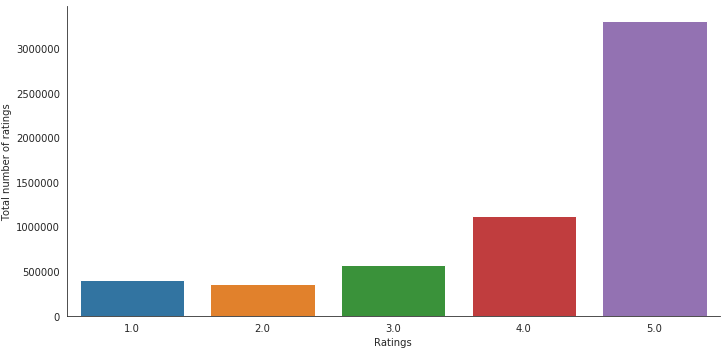

In [12]:
#CHECKING THE DISTRIBUTION OF THE RATING

with sns.axes_style('white'):
    g = sns.catplot("Ratings", data=product_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [13]:
#UNIQUE USERS AND PRODUCTS

In [14]:
print("\nTotal no of ratings :",product_data.shape[0])
print("Total No of Users   :", len(np.unique(product_data.User_Id)))
print("Total No of products  :", len(np.unique(product_data.Product_Id)))


Total no of ratings : 5748920
Total No of Users   : 3117268
Total No of products  : 1136004


In [15]:
#DROPPING THE TIMESTAMP COLUMN

In [16]:
product_data.drop(['Timestamp'],axis=1,inplace=True)

In [17]:
#POPULARUTY BASED RECOMMENDATION SYSTEM

In [18]:
popular_products=pd.DataFrame(product_data.groupby('Product_Id')['Ratings'].count())
most_popular=popular_products.sort_values('Ratings',ascending=False)
most_popular.head(10)

,Ratings
Product_Id,
B0058XIMMM,3047
B000FBO0DM,2836
B000NZW3J8,2797
B005LERHD8,2781
B006PGGJOE,2773
B000T9VK56,2685
B00012O12A,2214
B0000C321X,2105
B000O32MLI,2057


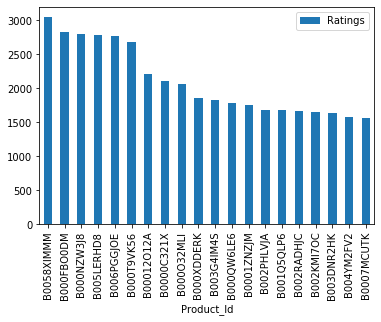

In [19]:
most_popular.head(20).plot(kind = "bar")

Analysis:-

The above graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # B0058XIMMM has sales of over 3000, the next most popular product, ID #B000FBO0DM  has sales of 2800, etc.

The product which has most number of ratings is the most popular product.

In [40]:
#NEAREST NEIGHBOR ITEM BASED COLLABORATIVE FILTERING

kNN is a ML algorithm to find clusters of similar users based on product ratiings, and make predictions using the average rating of top-k nearest neighbors . For example, we present ratings in a matrix with the matrix having one row for easch item (product) and one column for each user.

Then for each and every product how many total rating we will calculate new column that is total rating

In [21]:
#Taking subset of the dataset
product_data=product_data.iloc[:100000,0:]

In [22]:
#creating column with totalratingcount for each product given by the users

combine_product_rating = product_data.dropna(axis = 0, subset = ['Product_Id'])
product_ratingCount = (combine_product_rating.
     groupby(by = ['Product_Id'])['Ratings'].
     count().
     reset_index().
     rename(columns = {'Ratings': 'totalRatingCount'})
     [['Product_Id', 'totalRatingCount']]
    )
product_ratingCount.head()

,Product_Id,totalRatingCount
0,0000031887,236
1,0000037214,1
2,0123456479,78
3,0456787283,1
4,0456808574,1


In [23]:
#combining the column totalratingcount with original df

rating_with_totalRatingCount = combine_product_rating.merge(product_ratingCount, left_on = 'Product_Id', right_on = 'Product_Id', how = 'left')
rating_with_totalRatingCount.head()

,User_Id,Product_Id,Ratings,totalRatingCount
0,A2XVJBSRI3SWDI,0000031887,5.0,236
1,A2G0LNLN79Q6HR,0000031887,4.0,236
2,A2R3K1KX09QBYP,0000031887,2.0,236
3,A19PBP93OF896,0000031887,1.0,236
4,A1P0IHU93EF9ZK,0000031887,4.0,236


In [25]:
# with totalrating count >50 then only we consider that product

popularity_threshold = 50
rating_popular_product= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_product.head()

,User_Id,Product_Id,Ratings,totalRatingCount
0,A2XVJBSRI3SWDI,0000031887,5.000,236
1,A2G0LNLN79Q6HR,0000031887,4.000,236
2,A2R3K1KX09QBYP,0000031887,2.000,236
3,A19PBP93OF896,0000031887,1.000,236
4,A1P0IHU93EF9ZK,0000031887,4.000,236


In [26]:
rating_popular_product.shape

(71256, 4)

In [28]:
## First lets create a Pivot table

product_features_df=rating_popular_product.pivot_table(index='Product_Id',columns='User_Id',values='Ratings').fillna(0)
product_features_df.head()

User_Id,A0010876CNE3ILIM9HV0,A002971836EL17MBMEJ9U,A00341903TT44QTIBXWZC,A00618841YOLM01K79Z8P,A00635603LUUJQPQWSJW1,A006691321KQETNLF2AUR,A00678552PJMSLWDEUVT2,A0096585SGN72YC4RMDV,A0096637H8A2HR1P2MRH,A01086133UN669FB4IGT5,...,AZZIR2M36EGED,AZZJ3Z0NP2F2O,AZZLE0BWGUCMA,AZZMDW27MUJR6,AZZO5BF7J2MQ3,AZZOCU3SC5UPL,AZZOVA4R01IJ,AZZPXOXHYXG0F,AZZQWFXGO0A0L,AZZTOUKVTUMVM
Product_Id,,,,,,,,,,,,,,,,,,,,,
0000031887,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0123456479,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1608299953,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1617160377,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
B00001W0GC,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [29]:
#then convert into a matrix form

from scipy.sparse import csr_matrix

product_features_df_matrix = csr_matrix(product_features_df.values)

#apply knn

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(product_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [30]:
product_features_df.shape

(390, 68937)

In [36]:
query_index = np.random.choice(product_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(product_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

65


In [37]:
product_features_df.head()

User_Id,A0010876CNE3ILIM9HV0,A002971836EL17MBMEJ9U,A00341903TT44QTIBXWZC,A00618841YOLM01K79Z8P,A00635603LUUJQPQWSJW1,A006691321KQETNLF2AUR,A00678552PJMSLWDEUVT2,A0096585SGN72YC4RMDV,A0096637H8A2HR1P2MRH,A01086133UN669FB4IGT5,...,AZZIR2M36EGED,AZZJ3Z0NP2F2O,AZZLE0BWGUCMA,AZZMDW27MUJR6,AZZO5BF7J2MQ3,AZZOCU3SC5UPL,AZZOVA4R01IJ,AZZPXOXHYXG0F,AZZQWFXGO0A0L,AZZTOUKVTUMVM
Product_Id,,,,,,,,,,,,,,,,,,,,,
0000031887,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0123456479,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1608299953,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1617160377,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
B00001W0GC,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [39]:
#to get recommendation of a product 

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:'.format(product_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i,product_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for B00009QB5V:
1: B0001ZO3WU, with distance of 0.9861002982692864
2: B00007GD9W, with distance of 0.9874773259553963
3: B0002TOZ2S, with distance of 0.9916404592950356
4: B000086910, with distance of 0.9947487239523979
5: B0002M4VG0, with distance of 0.9951028749983636


In [41]:
#to get recommendation of a product 

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:'.format(product_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i,product_features_df.index[indices.flatten()[i]], distances.flatten()[i]))
        
        

Recommendations for B00009QB5V:
1: B0001ZO3WU, with distance of 0.9861002982692864
2: B00007GD9W, with distance of 0.9874773259553963
3: B0002TOZ2S, with distance of 0.9916404592950356
4: B000086910, with distance of 0.9947487239523979
5: B0002M4VG0, with distance of 0.9951028749983636


In [ ]:
#The most recommended product is with less distance i.e. B0001ZO3WU